#***GRIP Feb'21 Task 2 Prediction using Unsupervised ML***



# Name  - Mahak Saxena
Task 2 - *From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.*




In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans


# Import the Iris dataset

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Finding the optimum number of clusters for k-means classification

In [ ]:
#Assign values for data
x = iris_df.iloc[:, [0, 1, 2, 3]].values

#Using Elbow method to find the optimum number of clusters for k -means 
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.25600931571815,
 46.44618205128205,
 39.03998724608725,
 34.299712121212124,
 30.014398496240602,
 28.036906353450473,
 26.53452922077922]

# Plotting the result 
We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method).

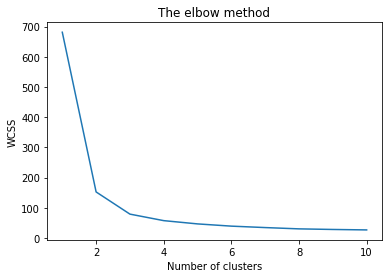

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.
plt.show()

Conclusion - From the above graph , the optimal number of clusters is 3

# Categorize the data 
k-means ensures that you get don’t fall into the random initialization trap.

In [ ]:
# Applying kmeans to the dataset 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# Visualization 

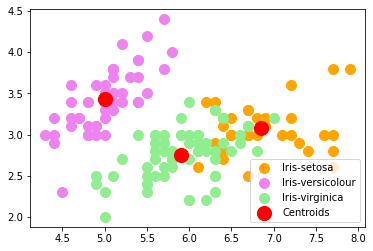

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'violet', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'lightgreen', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 200, c = 'red', label = 'Centroids')

plt.legend()